In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
import csv

In [28]:
train = pd.read_csv(r"C:\Users\raven\datas\diabetes expectation\train.csv")
test  = pd.read_csv(r"C:\Users\raven\datas\diabetes expectation\test.csv")

In [29]:
train.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,200,9,125,74,0,0,28.536910,0.444902,45,1
1,3832,4,109,80,0,0,28.047673,0.238243,22,0
2,4927,4,88,78,39,0,52.371341,0.279471,26,0
3,4088,9,125,74,0,0,40.062688,0.203922,45,0
4,3644,5,107,78,44,284,52.935068,0.284959,45,1


<AxesSubplot:>

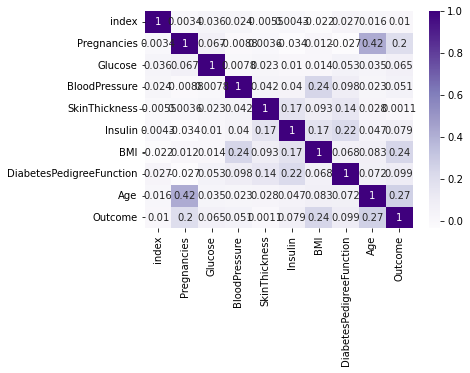

In [30]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix, cmap = 'Purples' , annot = True)

In [31]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = train[cols]
Y = train['Outcome']
X_test = test[cols]

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=1219)

In [32]:
cb =CatBoostClassifier()

cb.fit(X_train, Y_train)

Learning rate set to 0.014142
0:	learn: 0.6842387	total: 2.92ms	remaining: 2.92s
1:	learn: 0.6772310	total: 5.43ms	remaining: 2.71s
2:	learn: 0.6700078	total: 7.83ms	remaining: 2.6s
3:	learn: 0.6640692	total: 9.97ms	remaining: 2.48s
4:	learn: 0.6583069	total: 13.1ms	remaining: 2.61s
5:	learn: 0.6517411	total: 16ms	remaining: 2.65s
6:	learn: 0.6455784	total: 18.4ms	remaining: 2.6s
7:	learn: 0.6389584	total: 20.7ms	remaining: 2.56s
8:	learn: 0.6334391	total: 23ms	remaining: 2.53s
9:	learn: 0.6283355	total: 25.3ms	remaining: 2.5s
10:	learn: 0.6224488	total: 28.4ms	remaining: 2.55s
11:	learn: 0.6170315	total: 31.3ms	remaining: 2.58s
12:	learn: 0.6113020	total: 33.6ms	remaining: 2.55s
13:	learn: 0.6059187	total: 36.2ms	remaining: 2.55s
14:	learn: 0.6005951	total: 38.4ms	remaining: 2.52s
15:	learn: 0.5955257	total: 40.6ms	remaining: 2.5s
16:	learn: 0.5909768	total: 43.2ms	remaining: 2.5s
17:	learn: 0.5855592	total: 45.8ms	remaining: 2.5s
18:	learn: 0.5814186	total: 48.2ms	remaining: 2.49s
19

In [33]:
Y_pred = cb.predict(X_val)

In [35]:
accuracy_score(Y_pred, Y_val)

0.7722222222222223

In [38]:
cb_submission = cb.predict(X_test)

In [41]:
test['Outcome'] = cb_submission
test[['index', 'Outcome']].to_csv("submission.csv", index = False)